In [1]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
sys.path.append('d:/ariel2/code/core/')
sys.path.append('/kaggle/input/my-ariel2-library')
import kaggle_support as kgs
import ariel_model
import ariel_numerics
import ariel_gp
import ariel_load
import time
import numpy as np
import multiprocess
import importlib
import copy
import cupy as cp
import matplotlib.pyplot as plt
from tqdm import tqdm

local


In [2]:
train_data=kgs.load_all_train_data()

In [3]:
importlib.reload(ariel_numerics)
loaders = ariel_load.default_loaders()
for ii in range(2):
    loaders[ii].apply_pixel_corrections.mask_hot= False
res = []
#plt.figure()
for d in tqdm(train_data[:2]):
    d = copy.deepcopy(d)
    
    d.load_to_step(2, loaders)
    residuals = d.transits[0].data[1].data[:1000,:]
    #residuals = ariel_numerics.remove_trend_cp(d.transits[0].data[1].data)[5:-5,...]
    d.load_to_step(5, loaders)
    x=cp.mean(d.transits[0].data[1].data,0)
    if d.planet_id == train_data[0].planet_id:
        x0 = x
    residuals = residuals/x*x0
    
    #plt.plot(x.get())
    
    d.load_to_step(0, ariel_load.default_loaders())
    res.append(residuals)
res = cp.concatenate(res)

100%|█████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.29s/it]


In [4]:
import ariel_diagnostics
ariel_diagnostics.animate_3d_matrix(res[10:20,...].get())

In [5]:
np.prod(residuals.shape)*8/1e9

0.072192

In [6]:
# cov = (resF.T@resF)
# plt.figure()
# plt.imshow(cov[490:500,490:500].get())
# plt.colorbar()

In [7]:
15*32+15

495

100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:07<00:00,  1.41s/it]


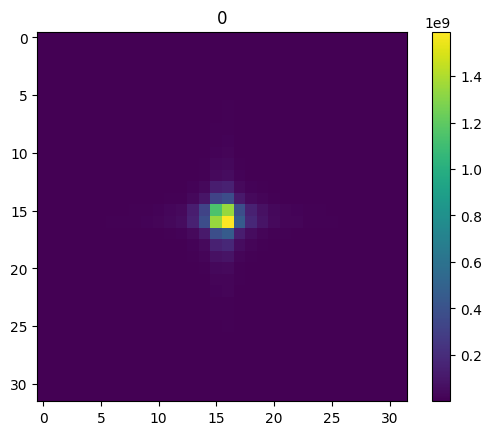

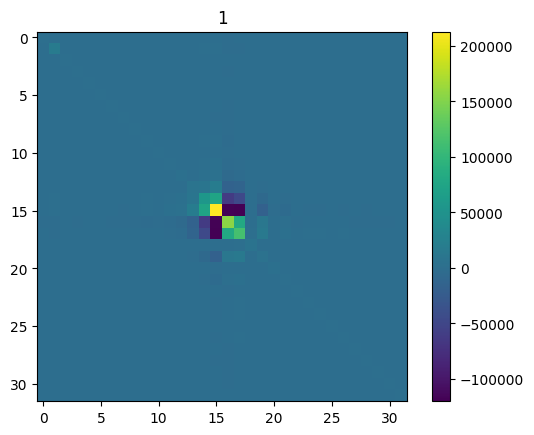

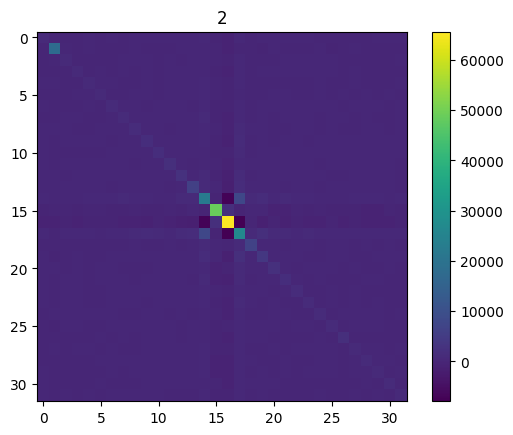

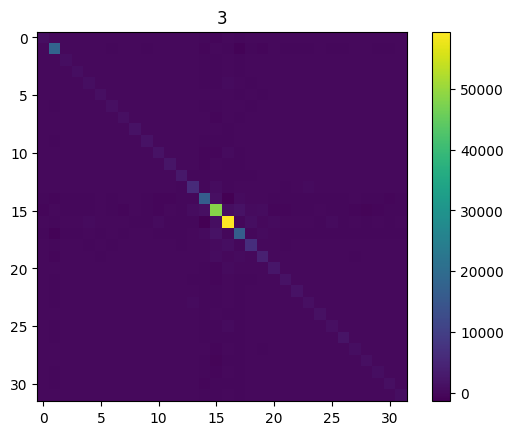

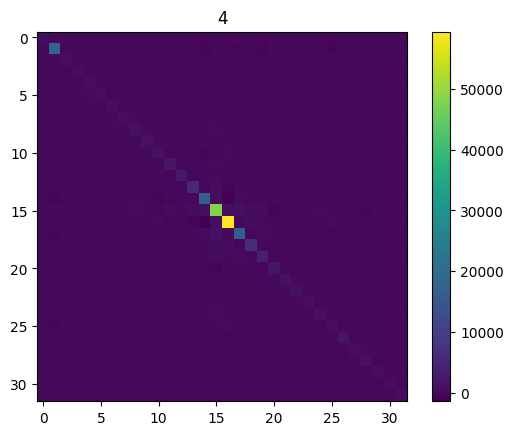

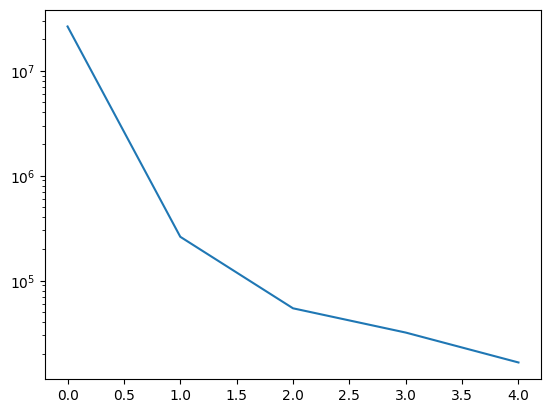

In [8]:
S = [];components = []; weights = []
dat = copy.deepcopy(res.reshape(res.shape[0],-1))
for ii in tqdm(range(5)):
    resF = dat
    cov = (resF.T@resF)/resF.shape[0]
    plt.figure()
    plt.imshow(cov[::282,::282].get())
    plt.colorbar()
    plt.title(ii)
    this_weights, this_components, this_S = ariel_numerics.nan_pca(dat, 1, tol=1e-1, verbose=False)
    dat -= this_weights * this_components
    S.append(this_S.get())
    components.append(this_components)
    weights.append(this_weights)
    resF = dat
    cov = (resF.T@resF)/resF.shape[0]
plt.figure()
plt.semilogy(S)

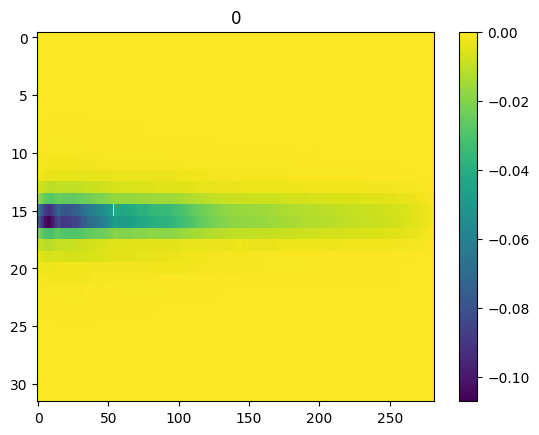

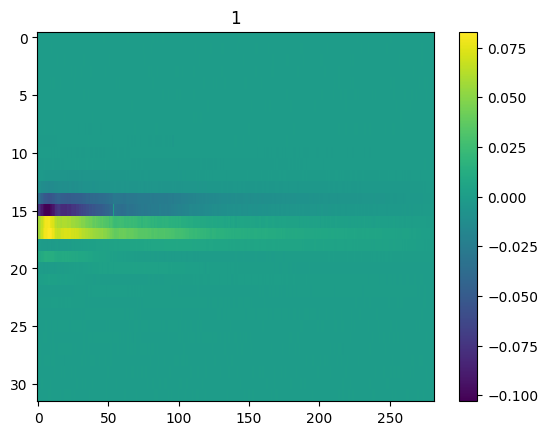

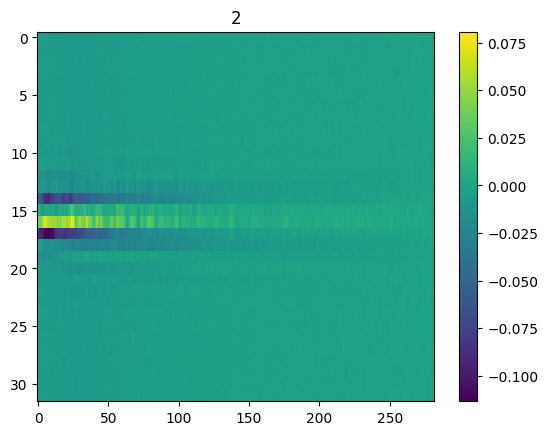

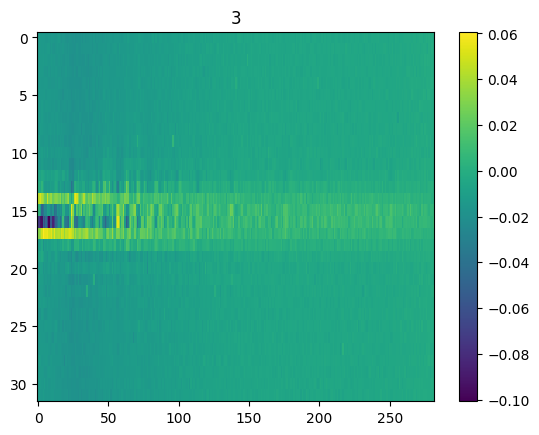

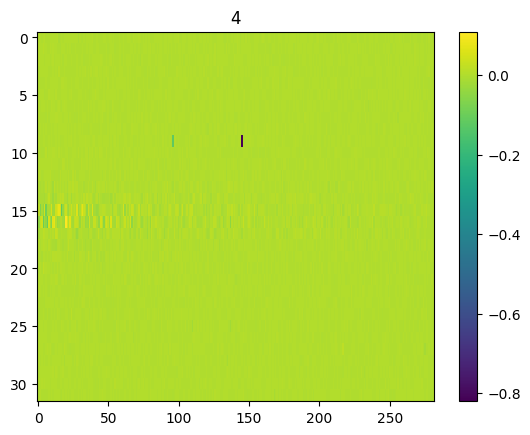

In [9]:
for ii in range(len(components)):
    plt.figure()
    plt.imshow(components[ii].reshape(32,282).get(), aspect='auto', interpolation='none')
    plt.colorbar()
    plt.title(ii)

(0.0, 100.0)

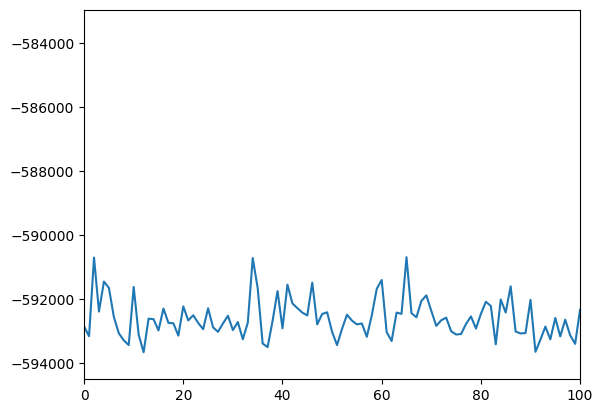

In [12]:
plt.plot(weights[0].get())
plt.xlim([0,100])

(0.0, 100.0)

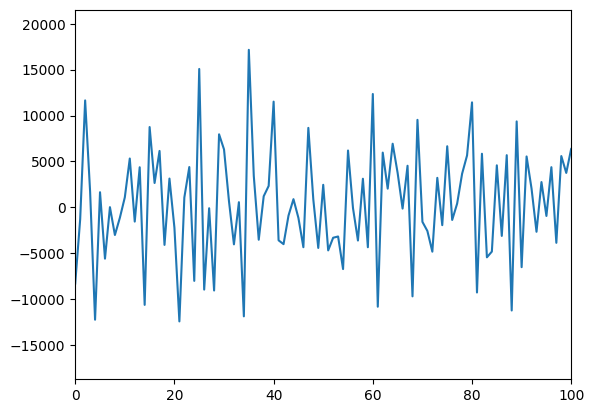

In [16]:
plt.plot(weights[1].get())
plt.xlim([0,100])